In [1]:
import pandas as pd

# Ruta al archivo zip
ruta = "/kaggle/input/ecobici-new/datos_modificados.csv"

# Leer archivo CSV comprimido en zip
datos = pd.read_csv(ruta)

# Verificar que se haya unido bien
print(datos.head())
print(datos.tail())  # Opcional, para ver el final del DataFrame

  Genero_Usuario  Edad_Usuario     Bici  Ciclo_Estacion_Retiro  \
0              M          35.0   4297.0                   86.0   
1            NaN          62.0   6992.0                  287.0   
2              M          31.0  10475.0                  186.0   
3              M          21.0   3063.0                   86.0   
4              M          30.0  11250.0                    1.0   

   Ciclo_Estacion_Arribo     FechaHora_Retiro     FechaHora_Arribo  \
0                   35.0  2020-12-31 17:59:22  2021-01-01 17:16:29   
1                  439.0  2020-12-31 19:14:03  2021-01-01 14:17:03   
2                  186.0  2020-12-31 23:43:58  2021-01-01 00:39:46   
3                   41.0  2020-12-31 23:38:35  2021-01-01 00:03:41   
4                    1.0  2020-12-30 19:12:51  2021-01-01 07:47:09   

   Duracion_Minutos  
0       1397.116667  
1       1143.000000  
2         55.800000  
3         25.100000  
4       2194.300000  
        Genero_Usuario  Edad_Usuario     Bici  Cic

In [2]:
print(datos.dtypes)

Genero_Usuario            object
Edad_Usuario             float64
Bici                     float64
Ciclo_Estacion_Retiro    float64
Ciclo_Estacion_Arribo    float64
FechaHora_Retiro          object
FechaHora_Arribo          object
Duracion_Minutos         float64
dtype: object


In [3]:
datos["Edad_Usuario"] = datos["Edad_Usuario"].astype("Int64")  # Convertir a enteros, permitiendo NAs
datos["Bici"] = datos["Bici"].astype(str)  # Convertir a texto (por si tiene valores mixtos)
datos["FechaHora_Retiro"] = pd.to_datetime(datos["FechaHora_Retiro"], errors="coerce")  # Convertir a datetime
datos["FechaHora_Arribo"] = pd.to_datetime(datos["FechaHora_Arribo"], errors="coerce")  # Convertir a datetime
datos["Duracion_Minutos"] = datos["Duracion_Minutos"].astype(float)

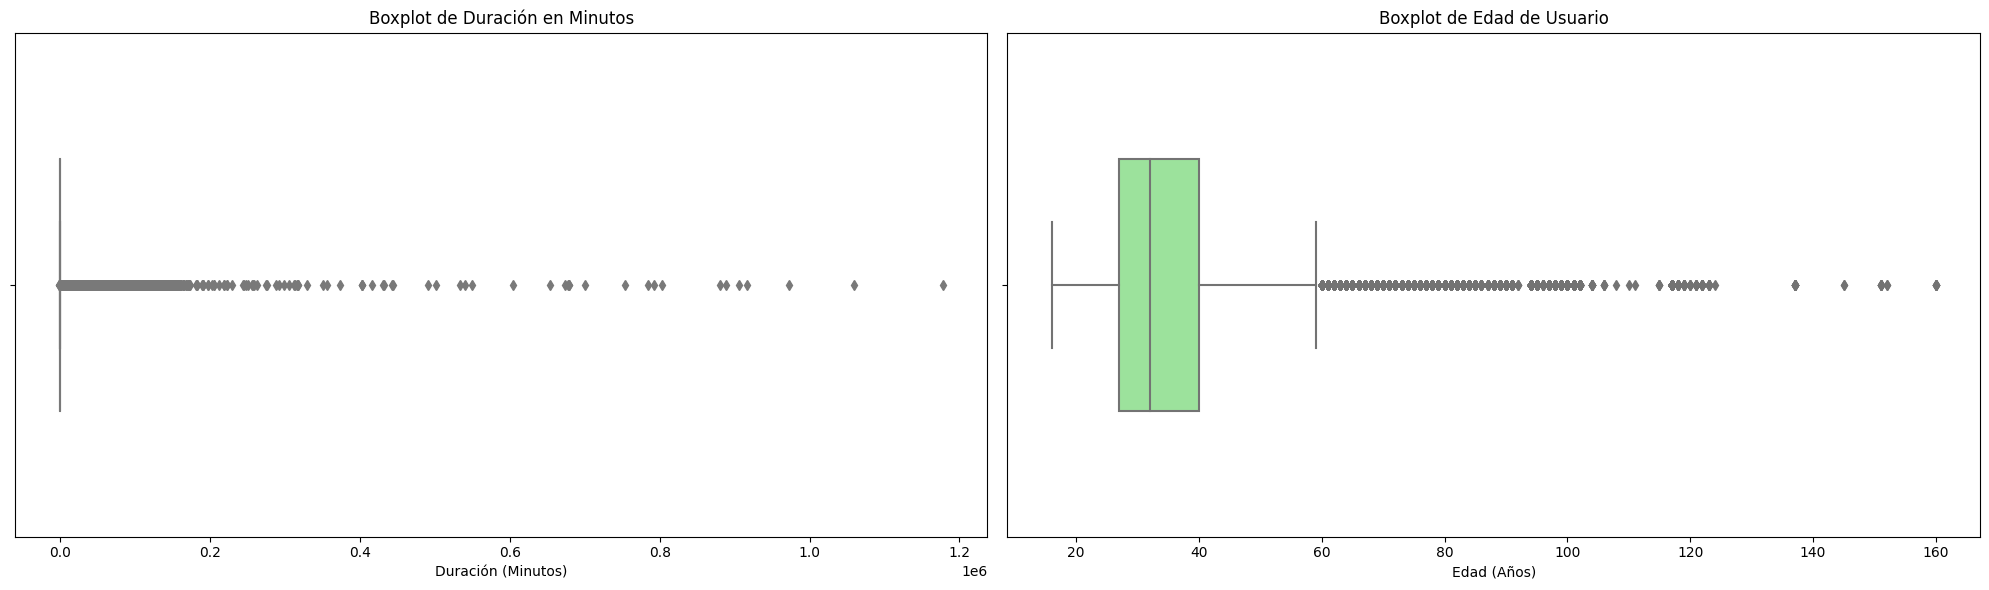

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la figura y los subgráficos (subplots) en una fila
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 fila, 4 columnas

# Boxplot de Duración en Minutos
sns.boxplot(x=datos["Duracion_Minutos"], color="lightblue", width=0.5, ax=axs[0])
axs[0].set_title("Boxplot de Duración en Minutos")
axs[0].set_xlabel("Duración (Minutos)")

# Boxplot de Edad del Usuario
sns.boxplot(x=datos["Edad_Usuario"], color="lightgreen", width=0.5, ax=axs[1])
axs[1].set_title("Boxplot de Edad de Usuario")
axs[1].set_xlabel("Edad (Años)")


# Ajustar el espacio entre los subgráficos para que no se sobrepongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


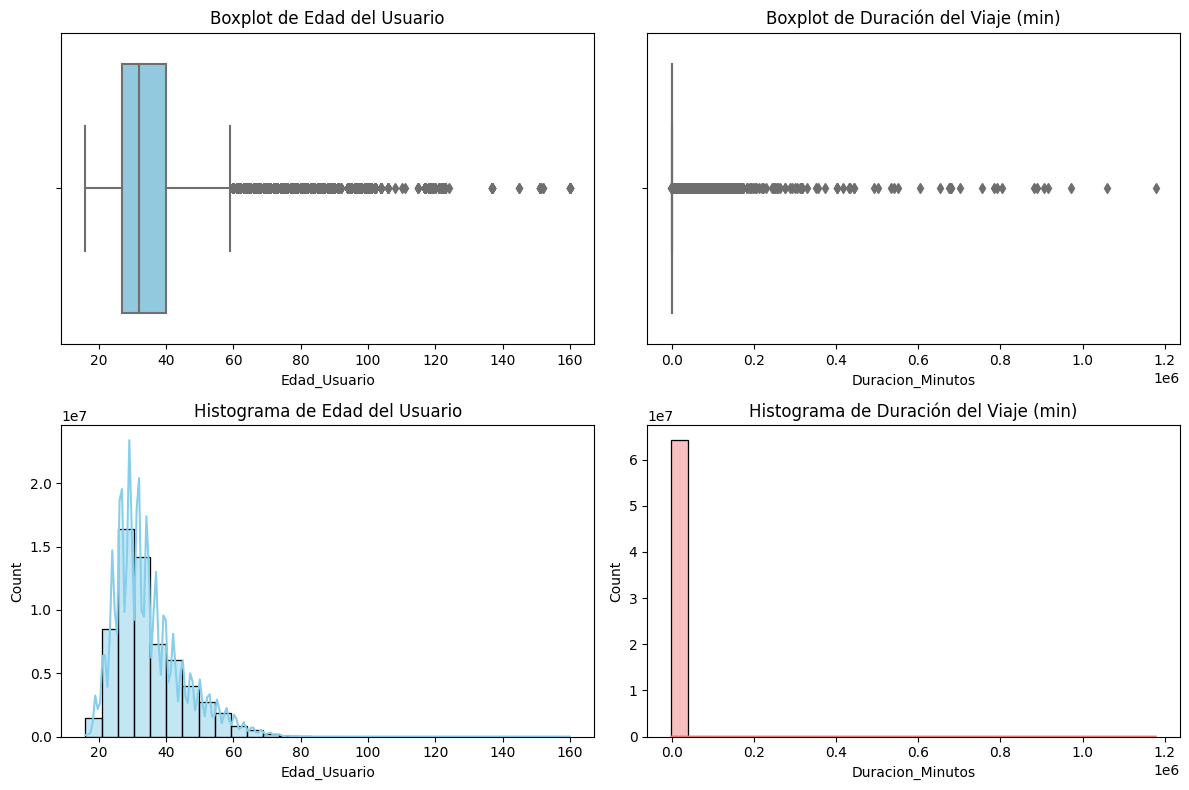

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Configurar los gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Boxplots
sns.boxplot(x=datos["Edad_Usuario"], ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Boxplot de Edad del Usuario")

sns.boxplot(x=datos["Duracion_Minutos"], ax=axes[0, 1], color="lightcoral")
axes[0, 1].set_title("Boxplot de Duración del Viaje (min)")

# Histogramas
sns.histplot(datos["Edad_Usuario"], bins=30, kde=True, ax=axes[1, 0], color="skyblue")
axes[1, 0].set_title("Histograma de Edad del Usuario")

sns.histplot(datos["Duracion_Minutos"], bins=30, kde=True, ax=axes[1, 1], color="lightcoral")
axes[1, 1].set_title("Histograma de Duración del Viaje (min)")

plt.tight_layout()
plt.show()

In [4]:
print(f"Valores negativos en Duracion_Minutos: {sum(datos['Duracion_Minutos'] < 0)}")

# Filtrar los datos eliminando las filas con valores negativos en la columna Duracion_Minutos
datos = datos[datos["Duracion_Minutos"] >= 0]

# Verificar que se eliminaron correctamente
print(f"Número de filas después de eliminar valores negativos: {len(datos)}")

registros_anomalos = datos[(datos["Ciclo_Estacion_Retiro"] == datos["Ciclo_Estacion_Arribo"]) & (datos["Duracion_Minutos"] < 2)]

# Contar la cantidad de registros que cumplen con las condiciones
cantidad_anomalos = len(registros_anomalos)

# Mostrar la cantidad de registros anómalos
print(f"Cantidad de registros anómalos: {cantidad_anomalos}")

datos = datos[~((datos["Ciclo_Estacion_Retiro"] == datos["Ciclo_Estacion_Arribo"]) & (datos["Duracion_Minutos"] < 2))]

Valores negativos en Duracion_Minutos: 0
Número de filas después de eliminar valores negativos: 1264748
Cantidad de registros anómalos: 0


In [5]:
# Calcular Q1, Q3 y IQR para Edad_Usuario
Q1_edad = datos["Edad_Usuario"].quantile(0.25)
Q3_edad = datos["Edad_Usuario"].quantile(0.75)
IQR_edad = Q3_edad - Q1_edad
lim_sup_edad = Q3_edad + 3 * IQR_edad

# Calcular Q1, Q3 y IQR para Duracion_Minutos
Q1_duracion = datos["Duracion_Minutos"].quantile(0.25)
Q3_duracion = datos["Duracion_Minutos"].quantile(0.75)
IQR_duracion = Q3_duracion - Q1_duracion
lim_sup_duracion = Q3_duracion + 3 * IQR_duracion

# Mostrar los umbrales
print("Umbrales de Edad_Usuario:")
print(f"Límite superior: {lim_sup_edad}")

print("\nUmbrales de Duracion_Minutos:")
print(f"Límite superior: {lim_sup_duracion}")

# Filtrar los registros que no superan el límite superior de Edad_Usuario
datos = datos[datos["Edad_Usuario"] <= lim_sup_edad]

# Filtrar los registros que no superan el límite superior de Duracion_Minutos
datos = datos[datos["Duracion_Minutos"] <= lim_sup_duracion]

# Mostrar la cantidad de registros después de filtrar
print(f"Cantidad de registros después de filtrar Edad_Usuario y Duracion_Minutos: {datos.shape[0]}")


Umbrales de Edad_Usuario:
Límite superior: 80.0

Umbrales de Duracion_Minutos:
Límite superior: 59.93333333333332
Cantidad de registros después de filtrar Edad_Usuario y Duracion_Minutos: 1244819


In [6]:
# Estadísticos descriptivos de todas las columnas numéricas
estadisticos = datos.describe()

# Mostrar los estadísticos descriptivos
print(estadisticos)

# Guardar el DataFrame modificado en un nuevo archivo CSV
datos.to_csv("/kaggle/working/datos_modificadosV2.csv", index=False)

       Edad_Usuario  Ciclo_Estacion_Retiro  Ciclo_Estacion_Arribo  \
count     1244819.0           1.244819e+06           1.244819e+06   
mean      35.712258           1.872195e+02           1.843532e+02   
min            17.0           1.000000e+00           1.000000e+00   
25%            28.0           6.900000e+01           6.800000e+01   
50%            33.0           1.600000e+02           1.540000e+02   
75%            41.0           2.880000e+02           2.830000e+02   
max            80.0           4.800000e+02           4.800000e+02   
std       10.508875           1.341361e+02           1.330034e+02   

                    FechaHora_Retiro               FechaHora_Arribo  \
count                        1244819                        1244819   
mean   2021-11-15 19:56:54.272297728  2021-11-15 20:12:05.613042688   
min              2020-12-31 23:38:35            2021-01-01 00:03:41   
25%       2021-10-25 09:30:08.500000            2021-10-25 09:44:11   
50%              2021-1

In [8]:
# Filtrar registros de edades entre 66 y 90
registros_edad_66_90 = datos.loc[(datos["Edad_Usuario"] >= 80) & (datos["Edad_Usuario"] <= 200)]

# Contar la cantidad de registros
cantidad_registros = registros_edad_66_90.shape[0]

# Mostrar el resultado
print(f"Cantidad de registros con edades entre 66 y 90: {cantidad_registros}")

# Filtrar registros con Duracion_Minutos entre 59 y 120
datos_59_120 = datos[(datos["Duracion_Minutos"] >= 59) & (datos["Duracion_Minutos"] <= 120)]

# Filtrar registros con Duracion_Minutos entre 120 y 200
datos_120_200 = datos[(datos["Duracion_Minutos"] > 120) & (datos["Duracion_Minutos"] <= 200)]

# Contar la cantidad de registros en cada rango
cantidad_59_120 = datos_59_120.shape[0]
cantidad_120_200 = datos_120_200.shape[0]

# Mostrar los resultados
print(f"Cantidad de registros con Duracion_Minutos entre 59 y 120: {cantidad_59_120}")
print(f"Cantidad de registros con Duracion_Minutos entre 120 y 200: {cantidad_120_200}")


Cantidad de registros con edades entre 66 y 90: 10841
Cantidad de registros con Duracion_Minutos entre 59 y 120: 323846
Cantidad de registros con Duracion_Minutos entre 120 y 200: 57884


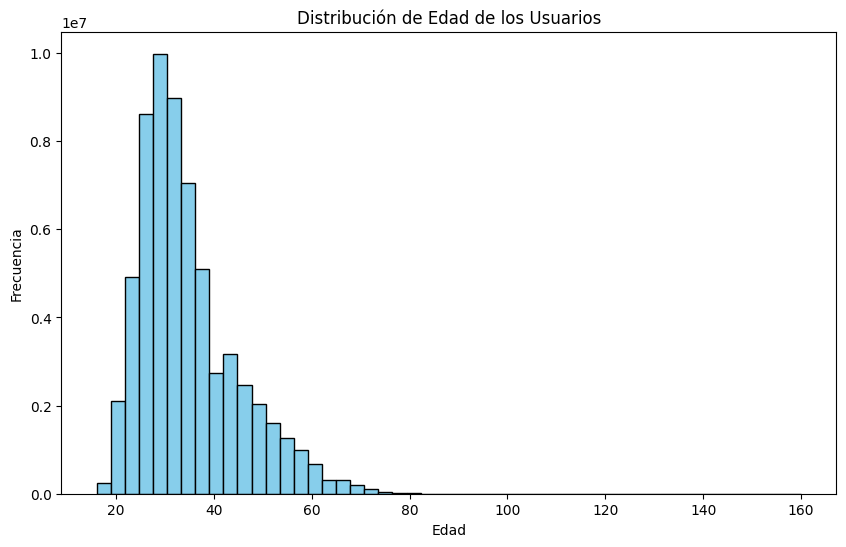

In [11]:
import matplotlib.pyplot as plt

# Histograma de la edad de los usuarios para visualizar su distribución
plt.figure(figsize=(10, 6))
plt.hist(datos["Edad_Usuario"], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de Edad de los Usuarios')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por ruta (retiro → arribo) y calcular el número de viajes y la duración promedio
rutas_frecuentes = datos.groupby(["Ciclo_Estacion_Retiro", "Ciclo_Estacion_Arribo"]).agg(
    Cantidad_Viajes=("Bici", "count"),  # Número de viajes en la ruta
    Duracion_Promedio=("Duracion_Minutos", "mean")  # Duración promedio en minutos
).reset_index()

rutas_frecuentes = rutas_frecuentes.sort_values(by="Cantidad_Viajes", ascending=False).reset_index(drop=True)
print(rutas_frecuentes.head(10))

top_rutas = rutas_frecuentes.head(10)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(top_rutas["Ciclo_Estacion_Retiro"].astype(str) + " → " + top_rutas["Ciclo_Estacion_Arribo"].astype(str), 
         top_rutas["Cantidad_Viajes"], color="skyblue")

plt.xlabel("Cantidad de Viajes")
plt.ylabel("Ruta (Estación Retiro → Estación Arribo)")
plt.title("Top 10 Rutas Más Frecuentes")
plt.gca().invert_yaxis()  # Invertir para que la ruta más usada esté arriba
plt.show()

In [5]:
len(datos)
datos.shape[0]

62978299

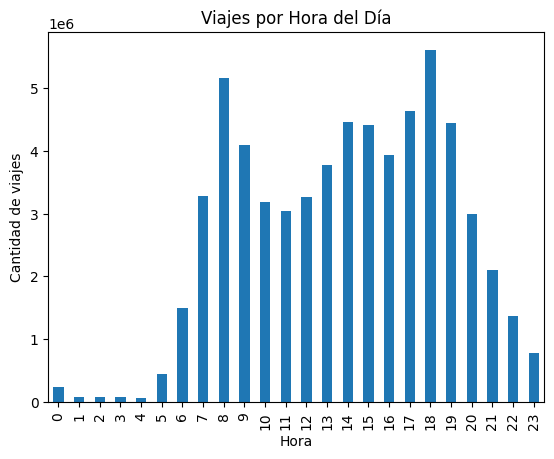

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
df = datos
viajes_hora = df['FechaHora_Retiro'].dt.hour.value_counts().sort_index()
viajes_hora.plot(kind='bar', title='Viajes por Hora del Día', ylabel='Cantidad de viajes', xlabel='Hora')
plt.show()

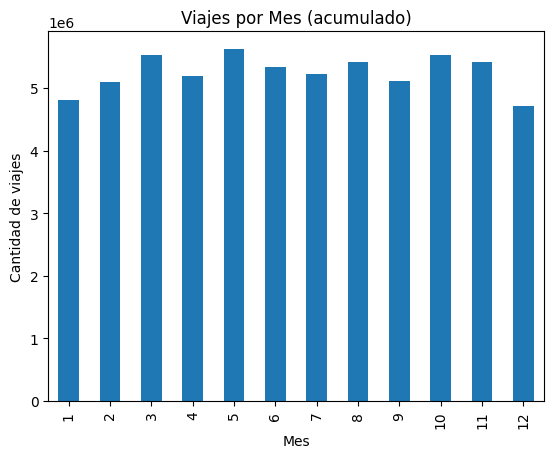

In [10]:

viajes_mes = df['FechaHora_Retiro'].dt.month.value_counts().sort_index()
viajes_mes.plot(kind='bar', title='Viajes por Mes (acumulado)', ylabel='Cantidad de viajes', xlabel='Mes')
plt.show()

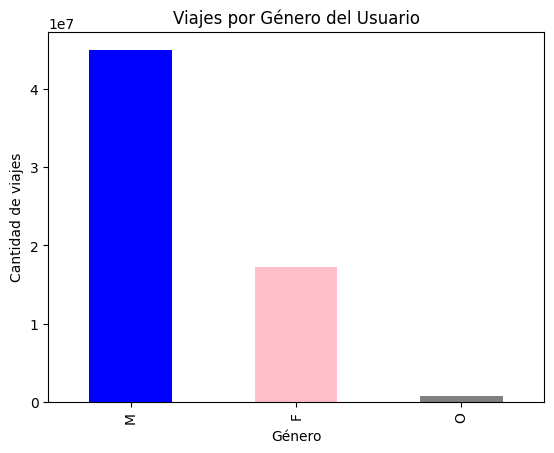

In [12]:
viajes_genero = df['Genero_Usuario'].value_counts()
viajes_genero.plot(kind='bar', title='Viajes por Género del Usuario', ylabel='Cantidad de viajes', xlabel='Género', color=['blue', 'pink', 'gray'])
plt.show()

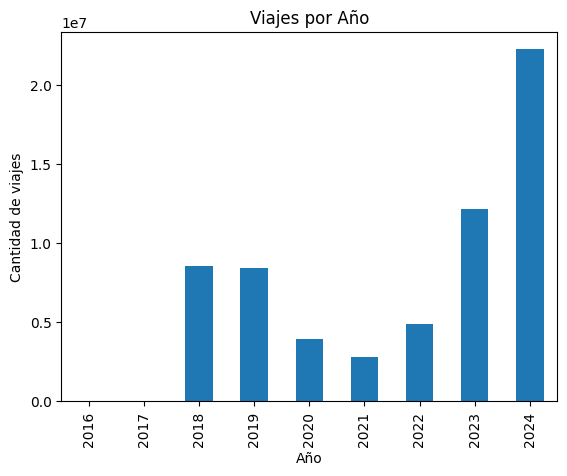

In [13]:
viajes_anio = df.groupby(df['FechaHora_Retiro'].dt.year).size()
viajes_anio.plot(kind='bar', title='Viajes por Año', ylabel='Cantidad de viajes', xlabel='Año')
plt.show()

In [ ]:
import os
print(os.listdir("/kaggle/working"))